### Quesion 1

In [2]:
import pandas as pd
Titan = pd.read_csv('Titan.csv')
oldScheme = Titan["Old Scheme (in thousands)"]
newScheme = Titan["New Scheme (in thousands)"]

In [3]:
oldShemeMean = oldScheme.mean()
newSchemeMean = newScheme.mean()
print("Means of Old and New Schemes are {0} and {1}".format(oldShemeMean, newSchemeMean))

Means of Old and New Schemes are 68.03333333333333 and 72.03333333333333


### Question 2 

In [4]:
from scipy.stats import ttest_ind,ttest_1samp,levene, shapiro,ttest_rel

For the assumption test, let's do Shapiro and levenes test first.

Shapiro Test : to check the normality of the Old Scheme data

H0: Null Hypothesis - Old Scheme Data is normally distributed

Ha: Alternate Hypothesis - Old Scheme Data is not normally distributed

In [35]:
print("Shapiro test for Old Scheme Data : {0}".format(shapiro(oldScheme)))

Shapiro test for Old Scheme Data : (0.9885103702545166, 0.981367290019989)


since p-value is greater than 5%, the old scheme data is normally distributed.

Shapiro Test to check the normality of the New Scheme data

H0: Null Hypothesis - New Scheme Data is normally distributed

Ha: Alternate Hypothesis - New Scheme Data is not normally distributed


In [32]:
print("Shapiro test for New Scheme Data : {0}".format(shapiro(newScheme)))

Shapiro test for New Scheme Data : (0.9687565565109253, 0.5057374835014343)


since p-value is greater than 5%, the new scheme data is normally distributed.

(array([5., 1., 4., 2., 4., 6., 2., 3., 2., 1.]),
 array([ 32.,  41.,  50.,  59.,  68.,  77.,  86.,  95., 104., 113., 122.]),
 <a list of 10 Patch objects>)

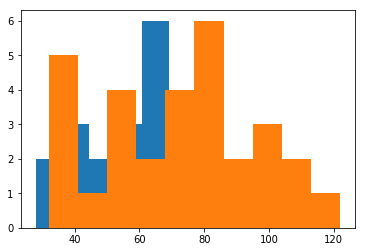

In [37]:
# vishual assumption test.
import matplotlib.pyplot as plt
plt.hist(oldScheme)
plt.hist(newScheme)

In [19]:

print("Levene's Test : to check the homogenity of the variances")

print("H0: All variances are equal")
print("Ha: Variance for the schemes are differents")

print(levene(oldScheme, newScheme))
print("Since Levene test p-value > 5%, all varience are equal")
print()


Levene's Test : to check the homogenity of the variances
H0: All variances are equal
Ha: Variance for the schemes are differents
LeveneResult(statistic=1.063061539437244, pvalue=0.30679836081811235)
Since Levene test p-value > 5%, all varience are equal



since two schemes data are normally distributed, we can go for parametric test.

Since we are going for parametric test and same samples with different experiment it is Paired test, we use ttest_1samp

H0: Population mean of old scheme = Population mean of new scheme 

Ha: Population mean of old scheme is not equal to Population mean of new scheme
 ie. Population mean of New scheme is lesser than or greater than Population mean of Old scheme.
 ie. Ha : New scheme has raised or reduced the outputs from Saleforce


In [39]:
#t_stat, p_value = ttest_rel(newScheme, oldScheme ) #new python method
#print("paired t-test value for these two samples, p-value : {0}".format( p_value))
t_stat, p_value = ttest_1samp(newScheme - oldScheme, 0 )
print("paired t-test value for these two samples, p-value : {0}".format( p_value))

#t_stat, p_value = ttest_ind(oldScheme, newScheme )
#print("t-test value for these two samples using ttest_ind: {0} p-value : {1}".format(t_stat, p_value))


paired t-test value for these two samples, p-value : 0.13057553961337662


since p-value > 5%, it is concluded that the new scheme has not raised outputs
 compared to old scheme outputs, ie Population mean of old scheme = Population mean of new scheme


### Question 3

Since p-value > 5%, the conclusion of above test is that there is no evidence from the data provided that new scheme has raised outputs from the mean equality test. Therefore we can say that there is no raise in the outputs due to the new scheme.

Though p-value > 5%, but it is near to 5%, so it is good idea to collect more data for better prediction.

Further to add, this test can be done after next month(5th month of new scheme initiation.) with more data collected to provide accurate prediction. 

### Question 4a

The probability of a type I error is the level of significance of the test of hypothesis, ie. 5%.

In [45]:
#import numpy as np
#old = Titan["Old Scheme (in thousands)"]
#oldmean = np.mean(old)
#z = ((oldmean+5) - oldmean)/np.std(old)
#print("Z-score : {0}".format(z))
#print("Probability of Type 1 error : {0}".format(1 - 0.00104))

### Question 4b

For old scheme and new scheme data are normally distributed, which has been already proved in previous question by Shapiro test and Levene's test has also already been used for the test of homogenity of the variance. 

The Data found to be normally distributed, we use Paired test for this problem as well.
We again go for parametric test since same sample with different experiment, so using, ttest-1samp test.

H0: The difference between population mean of Old scheme and population mean of new scheme <= $5000 (I think this is £5000 not the doller)

Ha: The difference between population mean of Old scheme and population mean of new scheme > $5000


In [46]:

t_stat, p_value = ttest_1samp(newScheme - oldScheme, 5 )
print("Paired t-test value for these two samples, p-value : {0}".format(p_value))


#t_stat, p_value = ttest_ind(oldScheme, newScheme)
#print("t-test value for these two samples : {0} p-value : {1}".format(t_stat, p_value))


Paired t-test value for these two samples, p-value : 0.7001334912613286


Since pvalue > 5%, it is concluded that, difference test says, the difference between population mean of Old scheme and population mean of new scheme <= $5000 as per data provided in the schema. At the 5 percent of signifigance level and from the given data, the outputs of the scheme has raised at 70 percent to break even point. 

Advice would be, As this is only 4th month of the scheme initiation, one more month can be taken for further analysis with more data, since 70% is good number to wait for the progress.

### Question 4c

In [43]:
# Calculating Power of Test
import numpy as np
(np.mean(oldScheme) - np.mean(newScheme)) / np.sqrt(((30-1)*np.var(oldScheme)+(30-1)*np.var(newScheme)) / (30 +30-2))



-0.18217632044690082

In [48]:
from statsmodels.stats.power import ttest_power
print(ttest_power(-0.18, nobs=60, alpha=0.05,df=60-1, alternative='larger'))


0.0012500340664407528


So power of test is 0.125%, this is because the data collected provides mean only near to break even point. this is ambiguous mean for break even point. Advice would be to collect more data or update level of significance as per the risk involved in the decision. 